# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from numpy import unique
from numpy import where
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

from sklearn.mixture import GaussianMixture

from sklearn.cluster import Birch

from sklearn.cluster import AffinityPropagation

from sklearn.cluster import MeanShift

from sklearn.cluster import OPTICS

from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Data Cleaning & Pre-Processing

In [3]:
data = pd.read_csv('segmentation data.csv')
data.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
# data = pd.read_csv("./marketing_campaign.csv", sep="\t")
# data.head(5).T

In [5]:
data.shape

(2000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Sex,2000.0,4.570000e-01,0.498272,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Marital status,2000.0,4.965000e-01,0.500113,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Education,2000.0,1.038000e+00,0.599780,0.0,1.000000e+00,1.0,1.000000e+00,3.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0
Occupation,2000.0,8.105000e-01,0.638587,0.0,0.000000e+00,1.0,1.000000e+00,2.0
Settlement size,2000.0,7.390000e-01,0.812533,0.0,0.000000e+00,1.0,1.000000e+00,2.0


In [8]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [9]:
data.duplicated().sum()

0

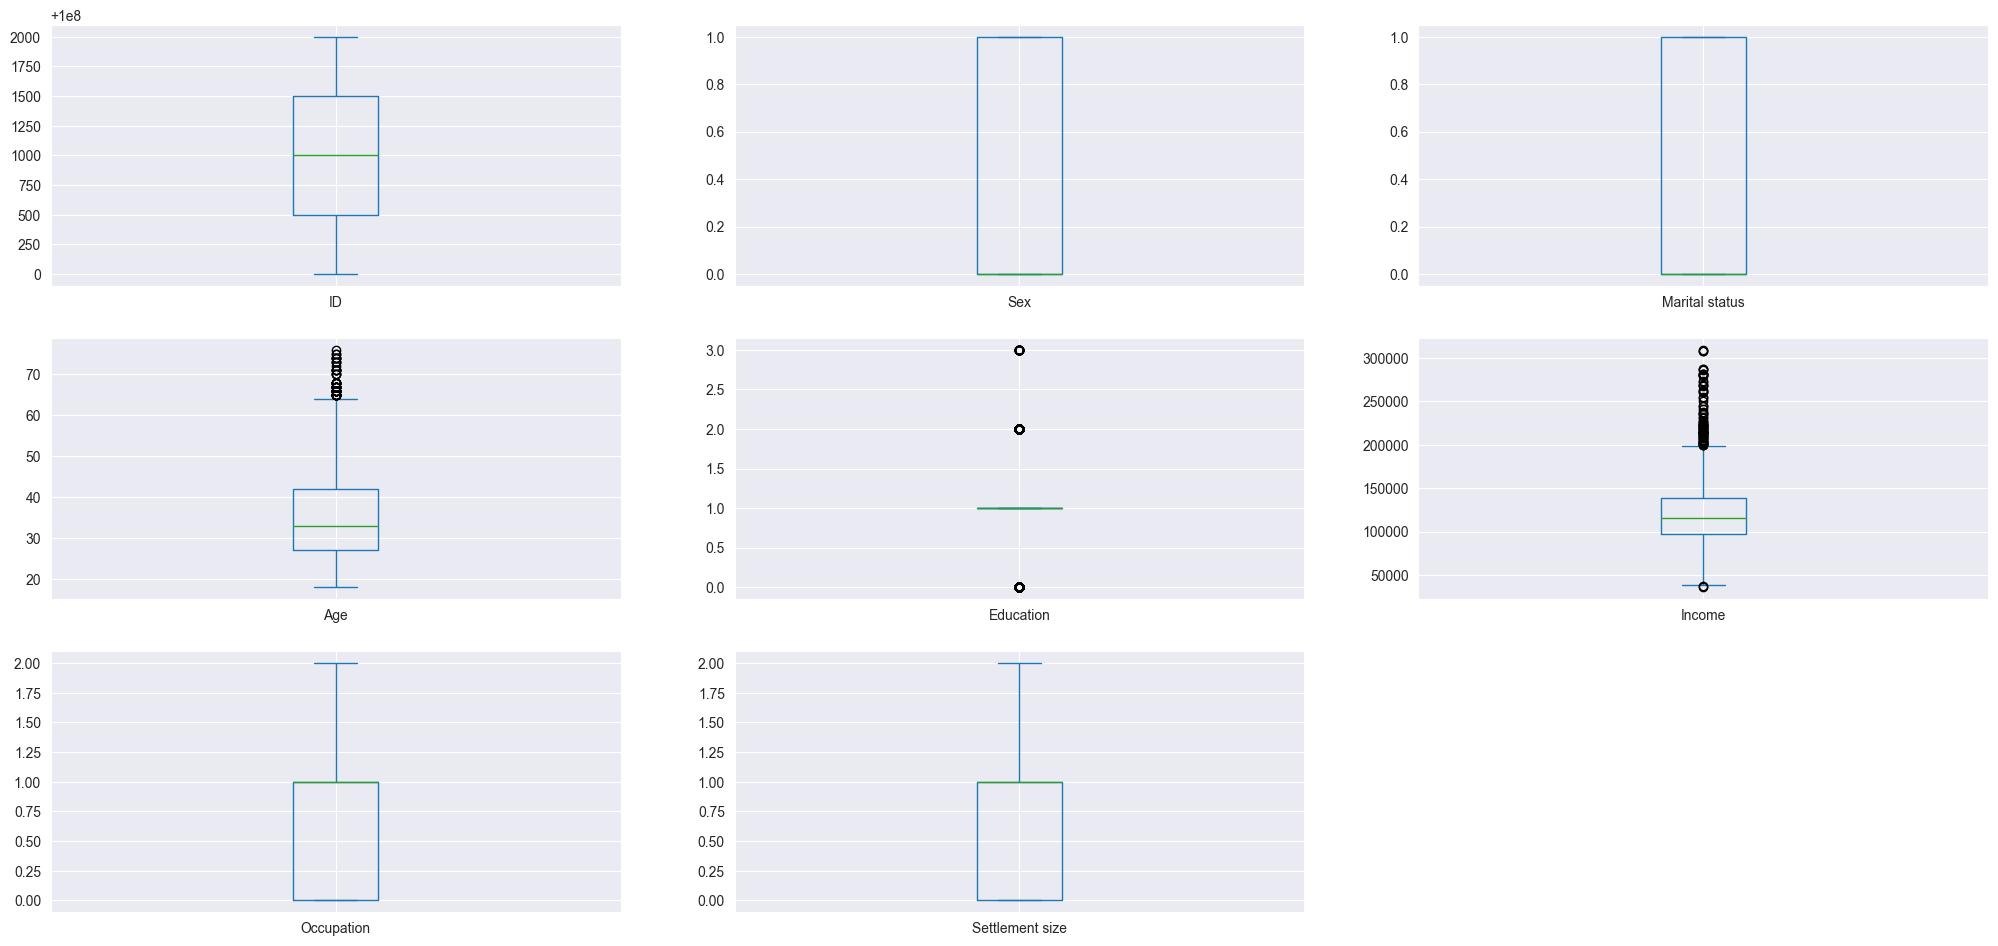

In [10]:
data.plot(kind='box',subplots=True,figsize=(25,40),layout=(10,3))
plt.show()

In [11]:
data.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


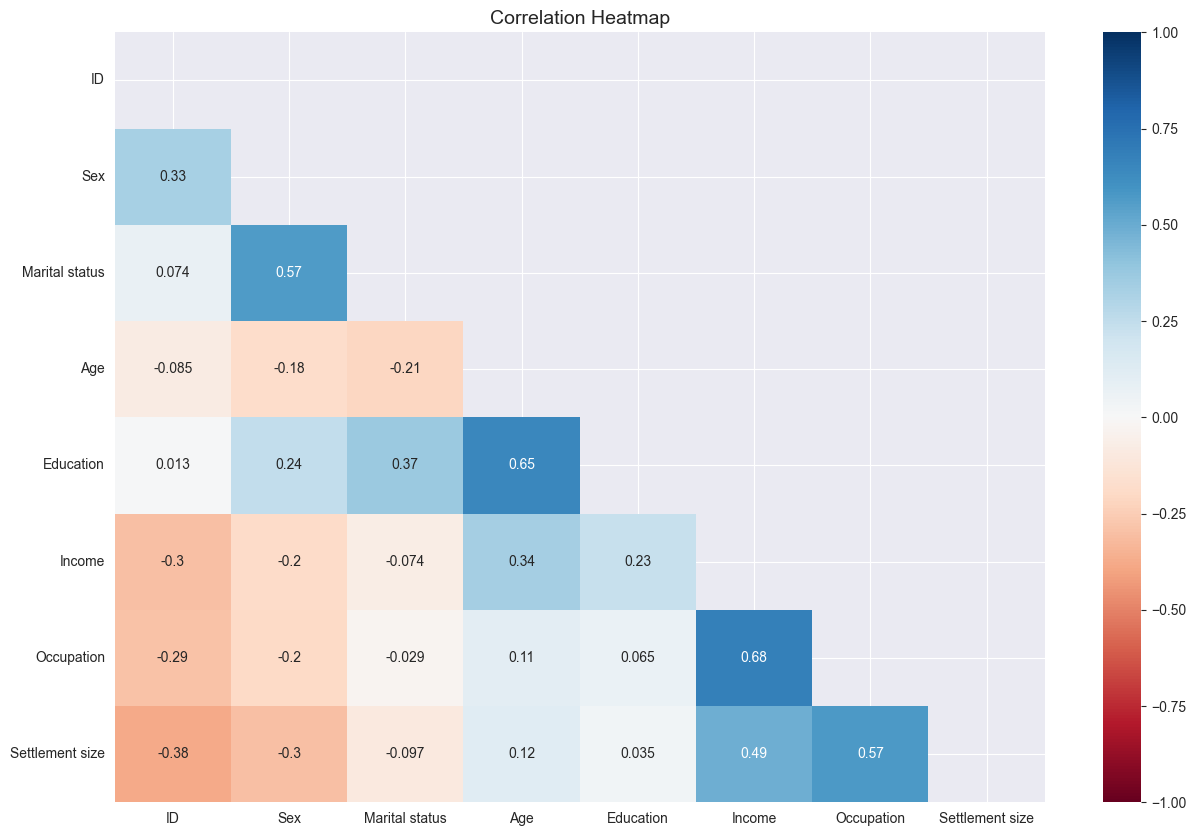

In [12]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), vmin=-1, vmax=1, mask=mask, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

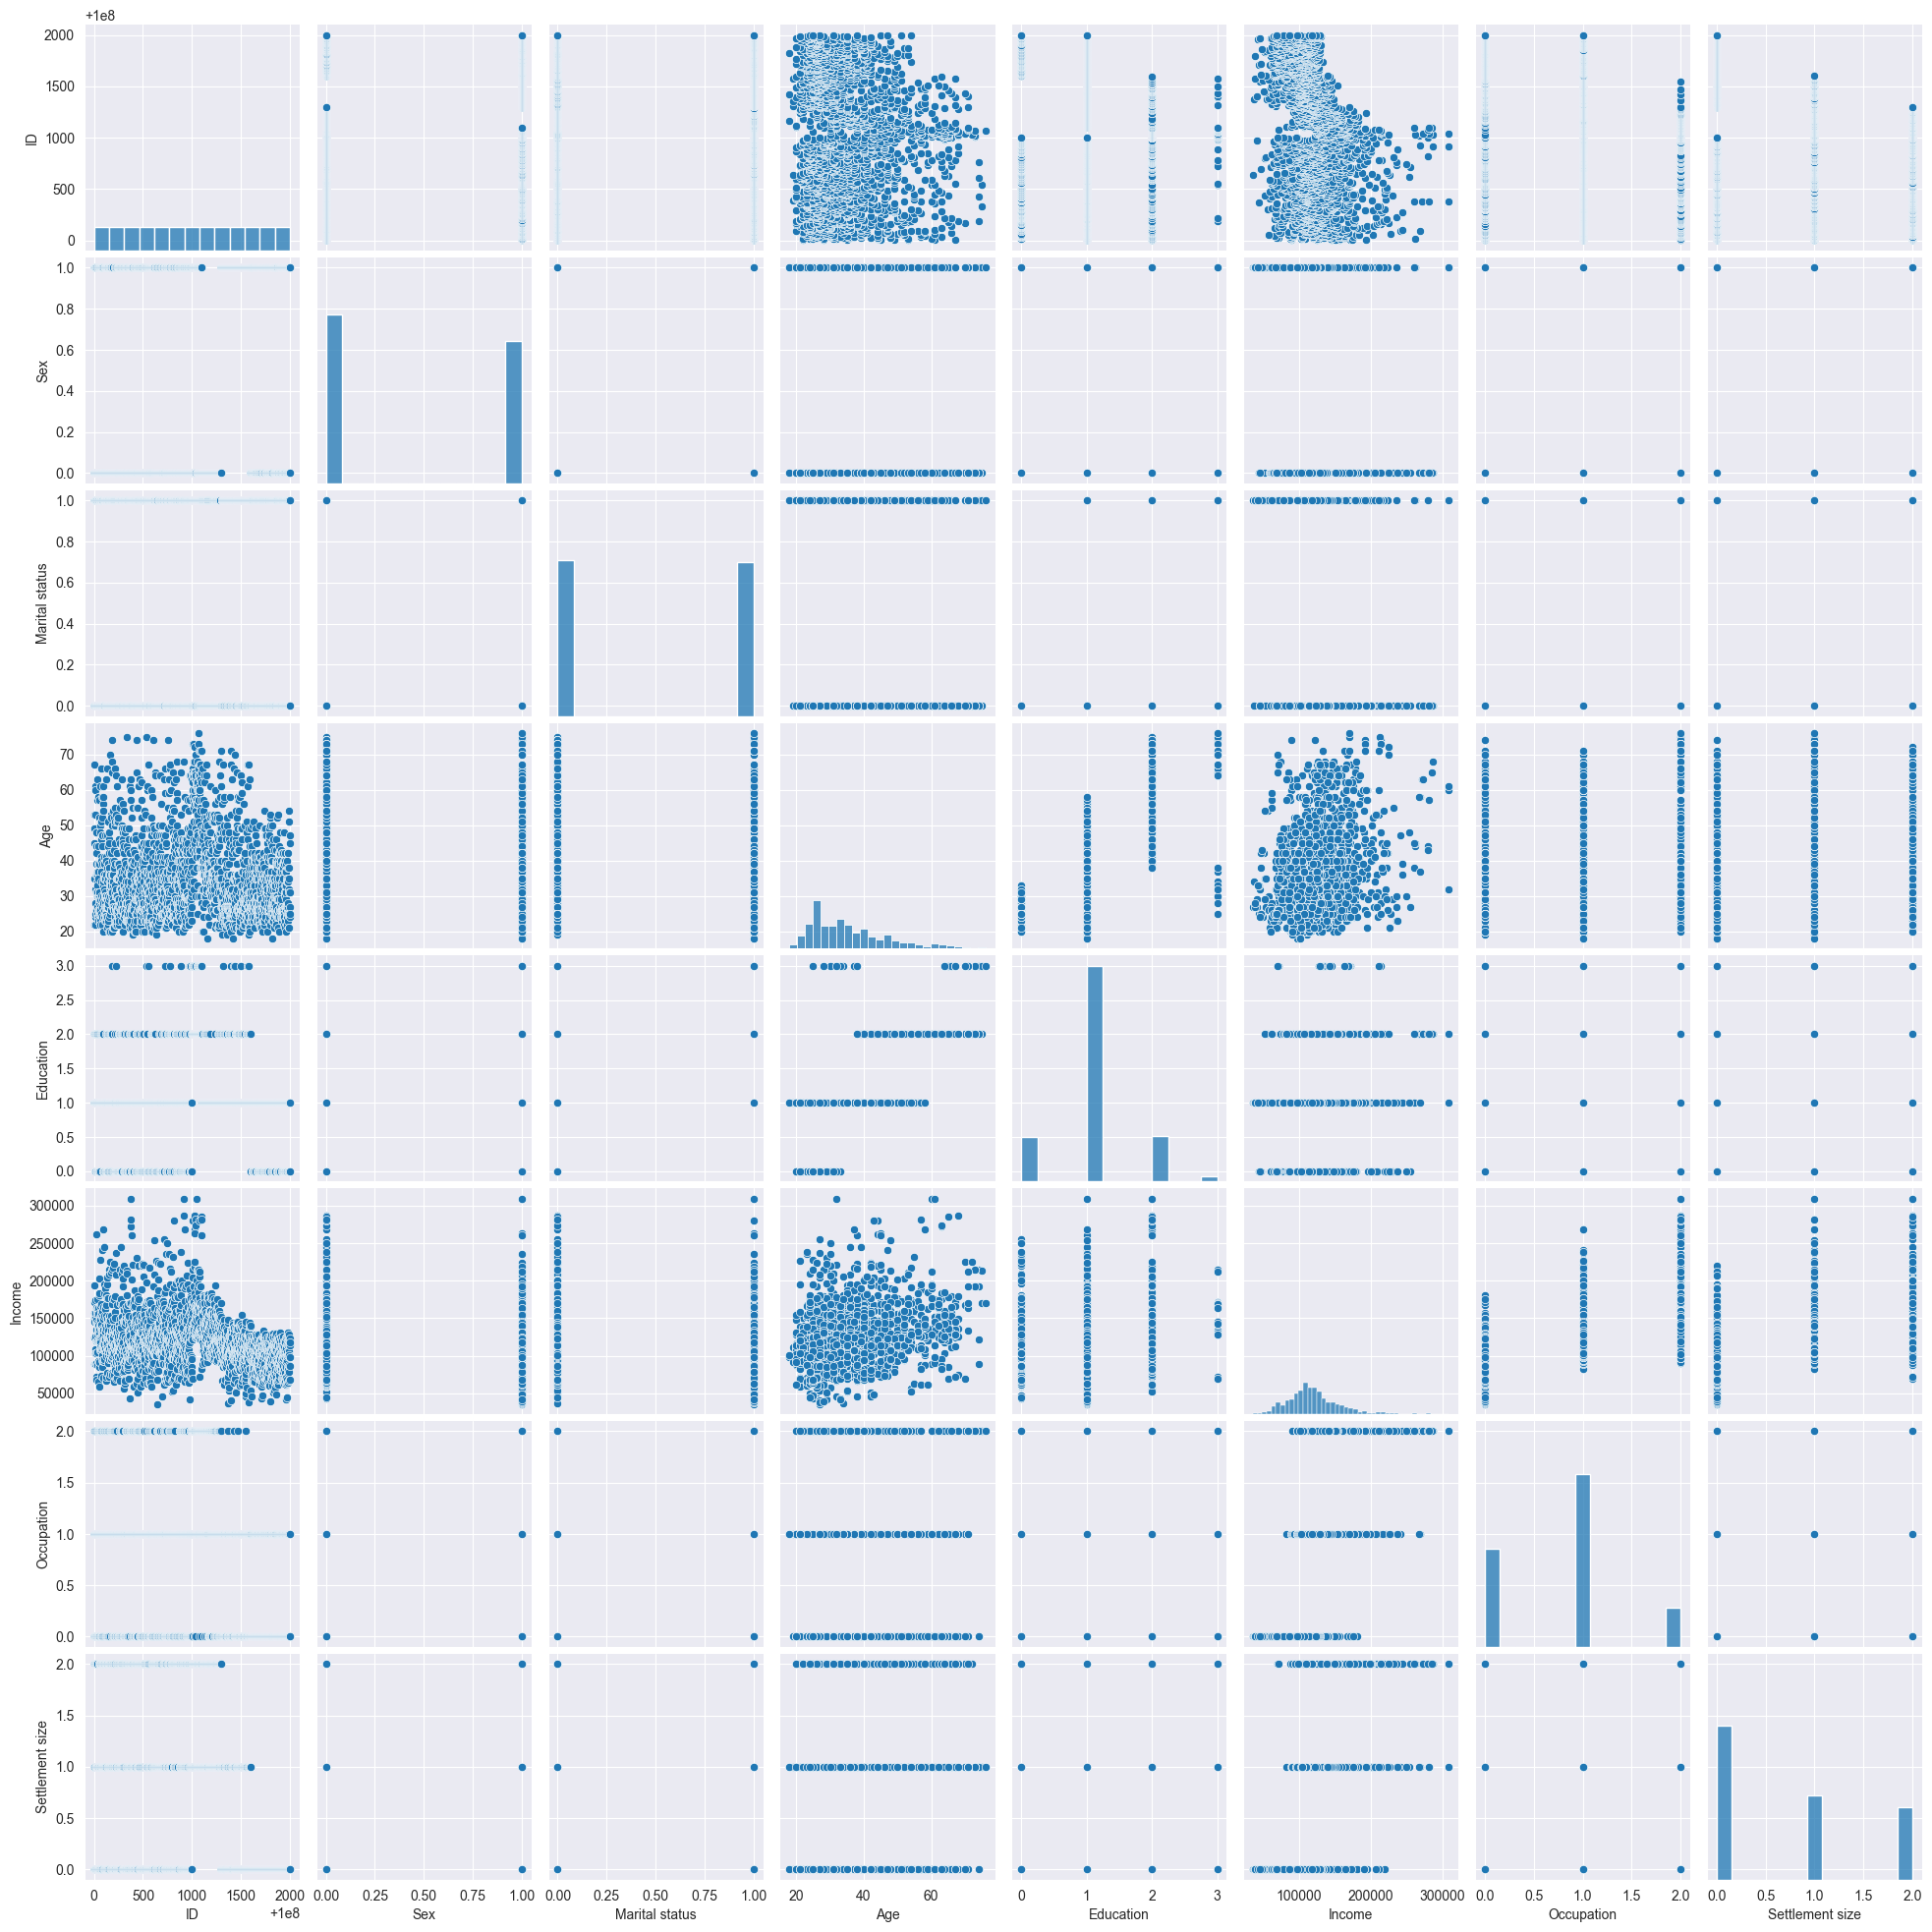

In [13]:
sns.pairplot(data)
plt.show()

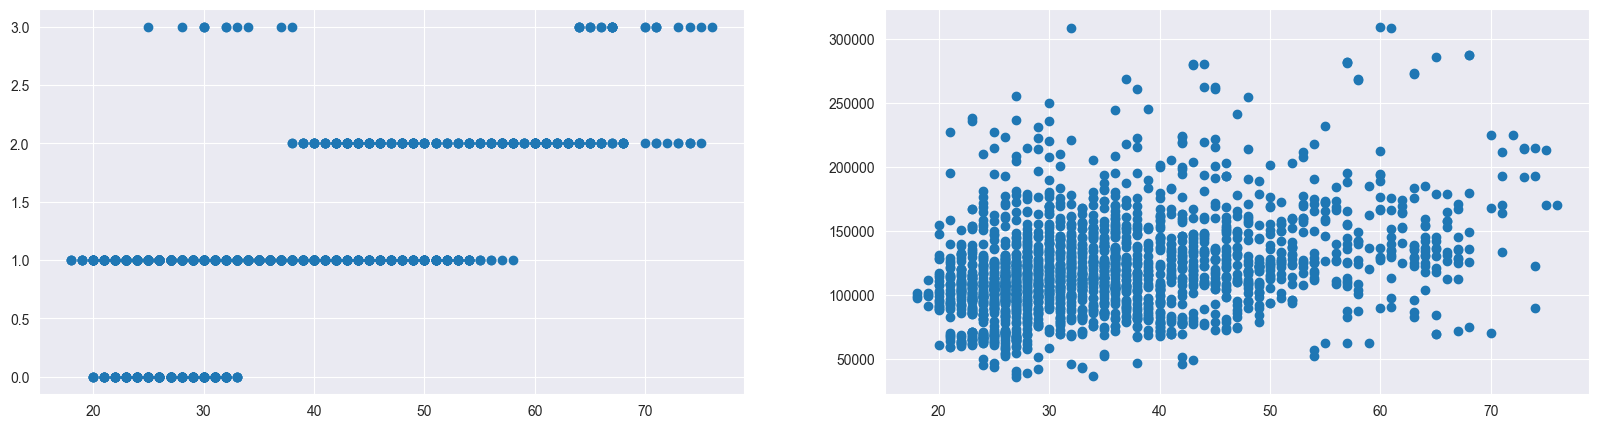

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.scatter(data['Age'], data['Education'])

plt.subplot(1,2,2)
plt.scatter(data['Age'], data['Income'])
plt.show()

# K-Means

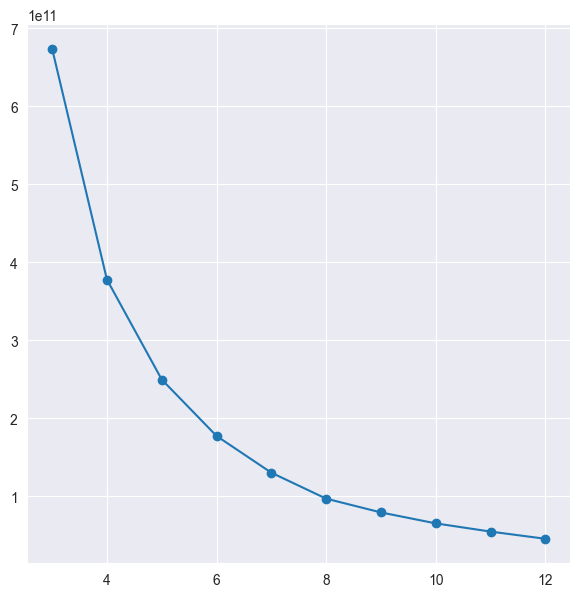

In [15]:
clusters_range=[3,4,5,6,7,8,9,10,11,12]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=42).fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

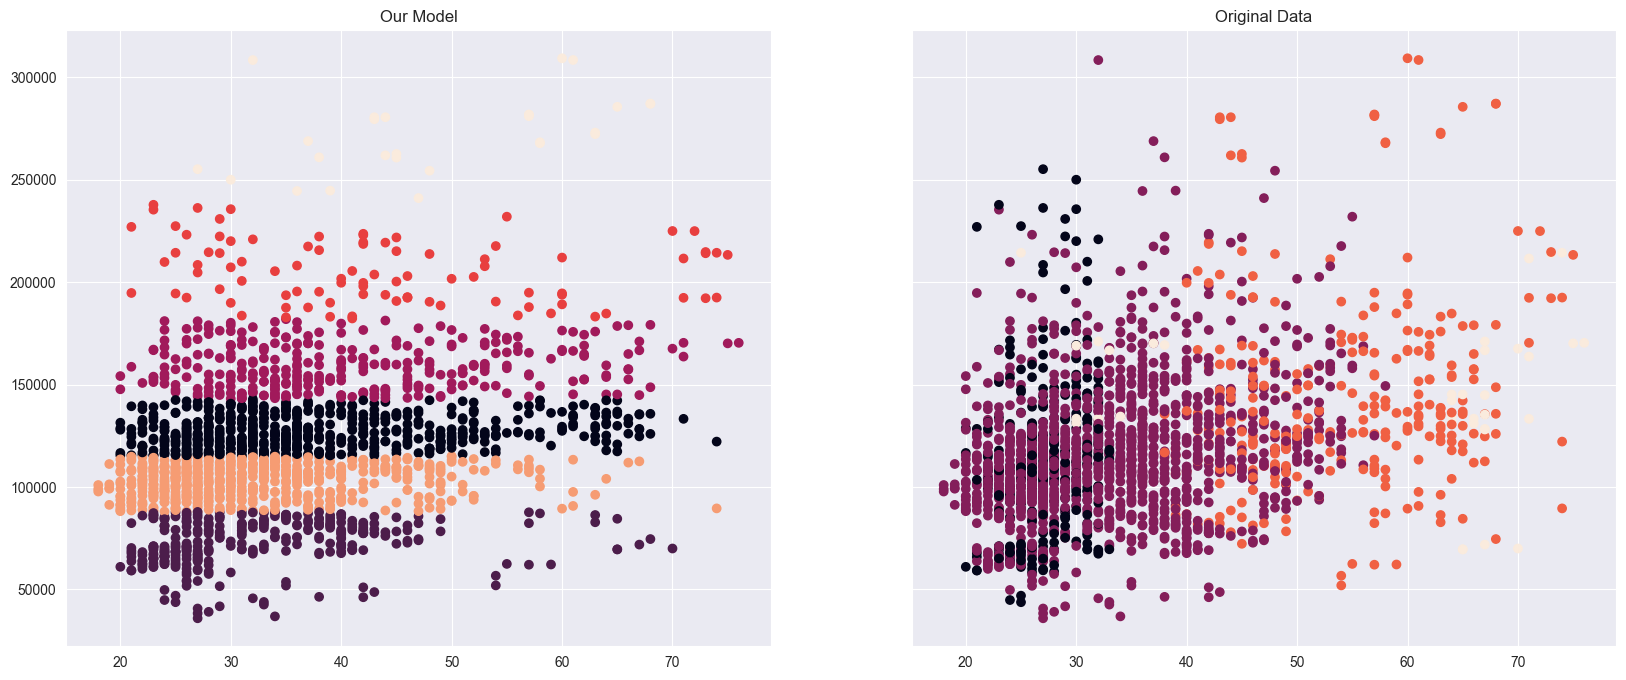

In [17]:
k_model_1 = KMeans(n_clusters=6)
k_model_1.fit(data)

lables_k = k_model_1.fit_predict(data)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))

ax1.set_title('Our Model')

ax1.scatter(data['Age'], data['Income'], c=k_model_1.labels_)

ax2.set_title('Original Data')

ax2.scatter(data['Age'], data['Income'], c=data['Education'])
plt.show()


In [34]:
sil_scores = []
calinski_score = []
davies_score = []

sil_scores.append(silhouette_score(data, lables_k))
calinski_score.append(calinski_harabasz_score(data, lables_k))
davies_score.append(davies_bouldin_score(data, lables_k))

print(sil_scores)
print(calinski_score)
print(davies_score)

[0.539717197722794]
[6135.486413884157]
[0.49537357346417066]


# Agglomerative Hierarchy clustering algorithm

In [27]:
from sklearn.preprocessing import normalize
data_norm = normalize(data)
df_norm = pd.DataFrame(data_norm, columns=data.columns)
print(df_norm.head())

         ID           Sex  Marital status           Age     Education  \
0  0.999999  0.000000e+00    0.000000e+00  6.699995e-07  1.999998e-08   
1  0.999999  9.999988e-09    9.999988e-09  2.199997e-07  9.999988e-09   
2  1.000000  0.000000e+00    0.000000e+00  4.899998e-07  9.999996e-09   
3  0.999999  0.000000e+00    0.000000e+00  4.499993e-07  9.999985e-09   
4  0.999999  0.000000e+00    0.000000e+00  5.299994e-07  9.999988e-09   

     Income    Occupation  Settlement size  
0  0.001247  9.999992e-09     1.999998e-08  
1  0.001508  9.999988e-09     1.999998e-08  
2  0.000892  0.000000e+00     0.000000e+00  
3  0.001716  9.999985e-09     9.999985e-09  
4  0.001490  9.999988e-09     9.999988e-09  


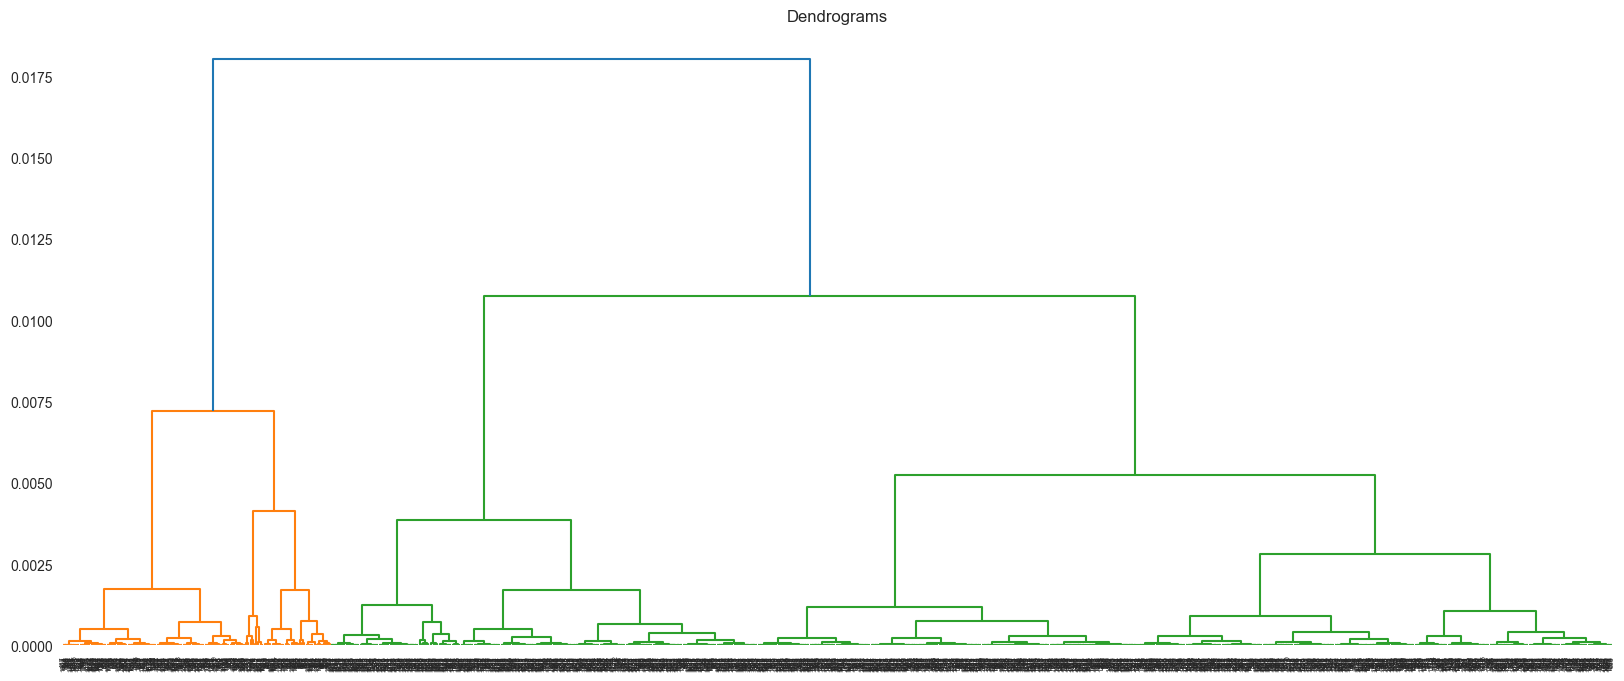

In [28]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_norm, method='ward'))
plt.show()

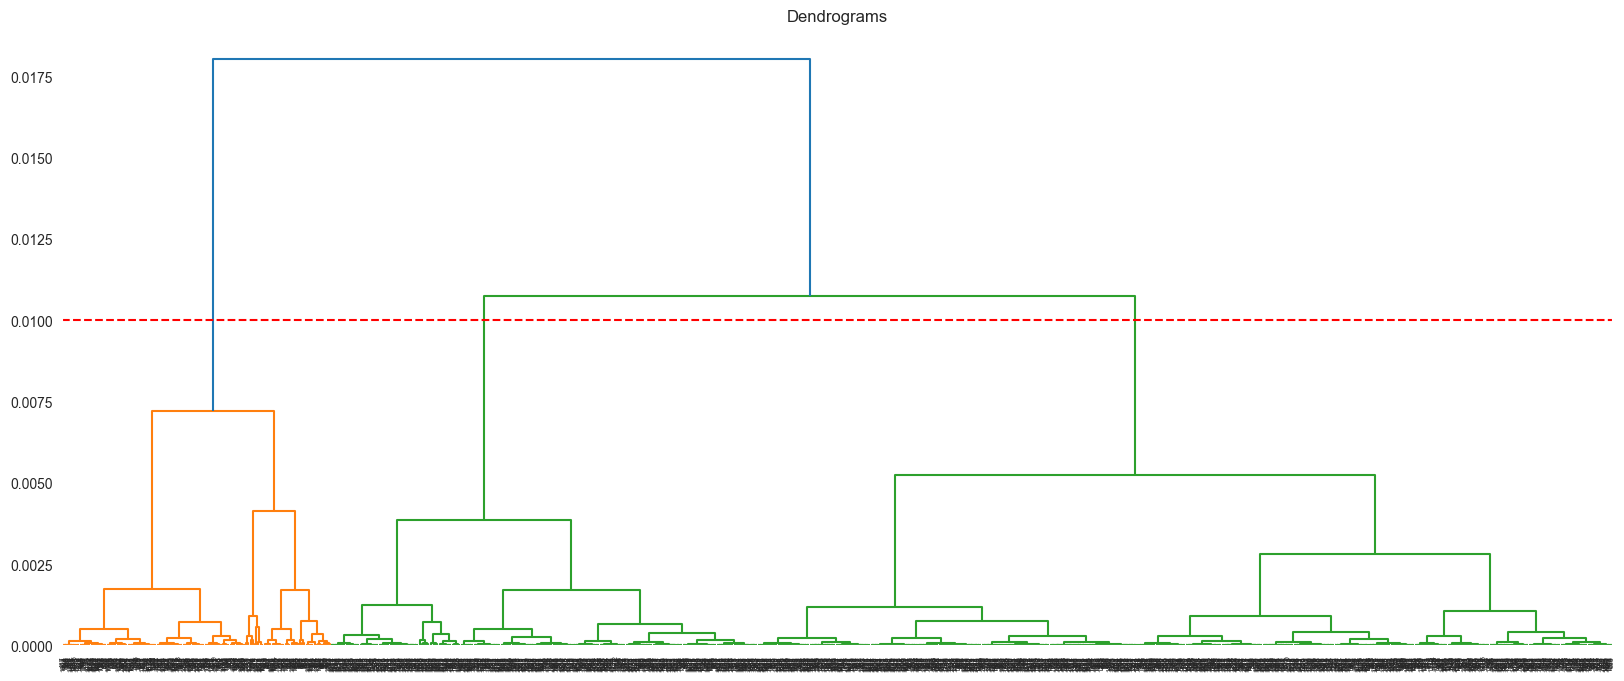

In [29]:
plt.figure(figsize=(20,8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_norm, method='ward'))
plt.axhline(y=0.01, color='r', linestyle='--')
plt.show()

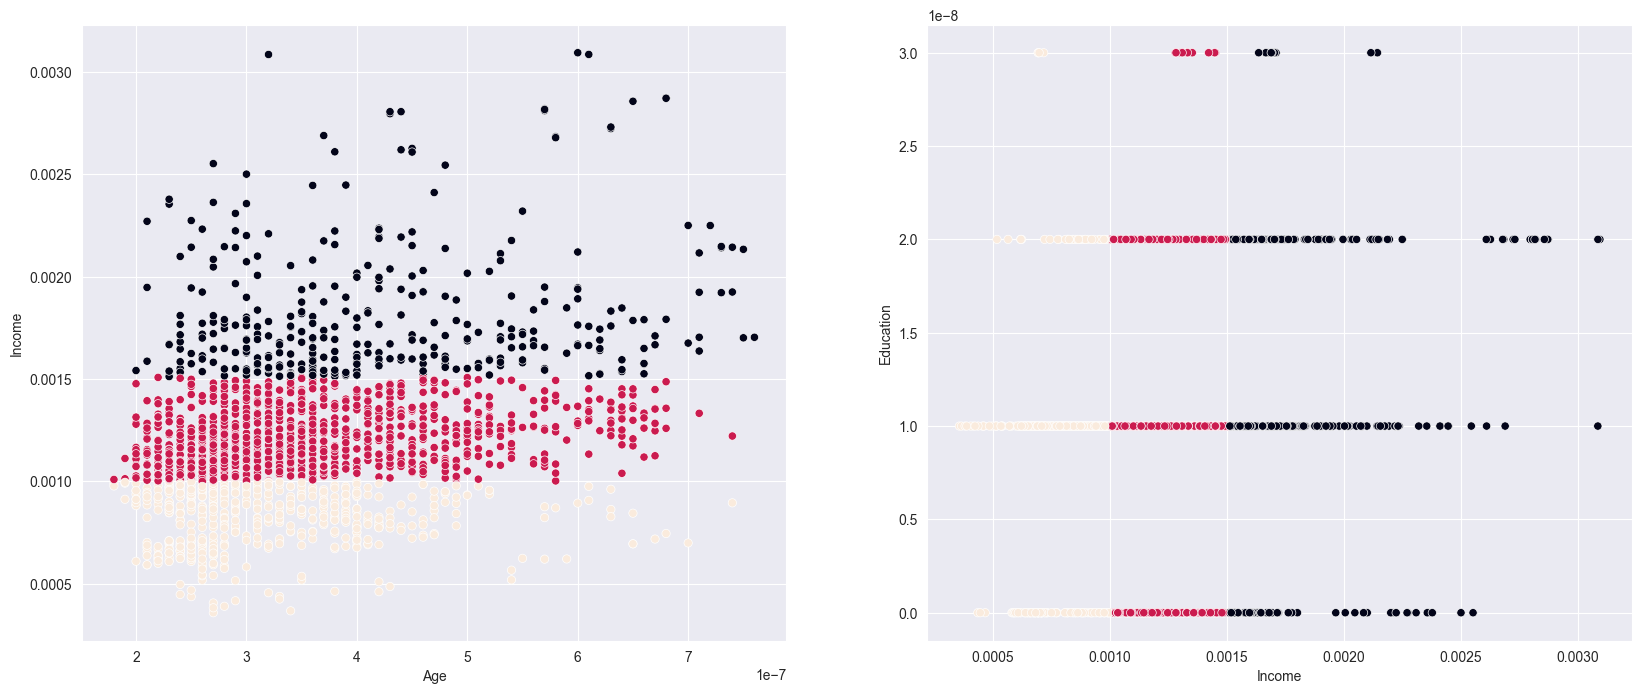

In [30]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
lables_ah = cluster.fit_predict(df_norm)

plt.figure(figsize=(20, 8))

# First Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_norm['Age'], y=df_norm['Income'], c=cluster.labels_)

plt.subplot(1,2,2)
sns.scatterplot(x=df_norm['Income'], y=df_norm['Education'], c=cluster.labels_)

plt.show()

In [35]:

sil_scores = []
calinski_score = []
davies_score = []

sil_scores.append(silhouette_score(data, lables_ah))
calinski_score.append(calinski_harabasz_score(data, lables_ah))
davies_score.append(davies_bouldin_score(data, lables_ah))

print(sil_scores)
print(calinski_score)
print(davies_score)

[0.5217522117269313]
[3152.407665830217]
[0.5896631572149521]


# DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler

# stscaler = StandardScaler().fit(data)
# df_db = stscaler.transform(data)
df_db = data
dbsc = DBSCAN(eps = 500006, min_samples = 20).fit(df_db)
labels_db = dbsc.labels_

df_db['cluster'] = labels_db

# df_db

n_clusters_ = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_ = list(labels_db).count(-1)

# print("Estimated number of clusters: %d" % n_clusters_)
# print("Estimated number of noise points: %d" % n_noise_)
labels_db_pred = dbsc.fit_predict(df_db)
# print(labels_db_pred)

core_samples = np.zeros_like(labels_db, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

plt.figure(figsize=(20, 8))

# First Plot
plt.scatter(df_db["Age"],df_db["Income"],c=df_db['cluster'])

# sns.scatterplot(x=df_db[:,0], y=df_db[:,3], c=labels_db)

plt.show()

<Axes: xlabel='x', ylabel='y'>

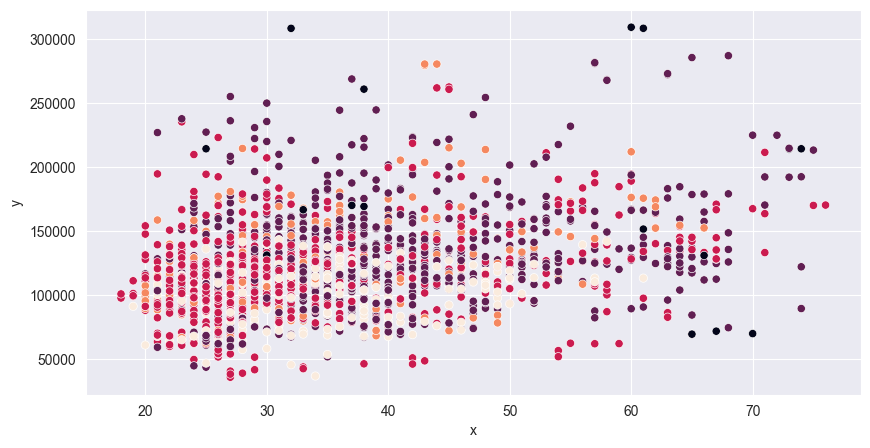

In [420]:
from sklearn.cluster import DBSCAN
sc = StandardScaler()
data_db_sc = sc.fit_transform(data)
dbsc = DBSCAN(eps = 2, min_samples = 10, n_jobs=5).fit(data_db_sc)
# data_db_sc['cluster'] = cluster
cluster = dbsc.labels_

labels_db = dbsc.fit_predict(data_db_sc)

# def show_clusters(X, cluster):
df_db = pd.DataFrame(dict(x=data['Age'], y=data['Income'], label=cluster))
# df_db = df_db[df_db['label'] != -1]
# # 
# colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow'}
fig, ax = plt.subplots(figsize=(10,5))
# grouped = df_db.groupby('label')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, c=colors[key])
# plt.xlabel('x_1')
# plt.ylabel('x_2')
# plt.show()

sns.scatterplot(x=df_db['x'], y=df_db['y'], c=cluster)


In [396]:
df_db

,x,y,label
0,67,124670,0
1,22,150773,0
2,49,89210,0
3,45,171565,0
4,53,149031,0
...,...,...,...
1995,47,123525,0
1996,27,117744,0
1997,31,86400,0
1998,24,97968,0


In [407]:

sil_scores = []
calinski_score = []
davies_score = []

sil_scores.append(silhouette_score(data_db_sc, cluster))
calinski_score.append(calinski_harabasz_score(data_db_sc, cluster))
davies_score.append(davies_bouldin_score(data_db_sc, cluster))

print(sil_scores)
print(calinski_score)
print(davies_score)
# DBSCAN

[0.3624026329955335]
[46.528041633317656]
[1.1971787063398236]


# Gaussian Mixture Model algorithm

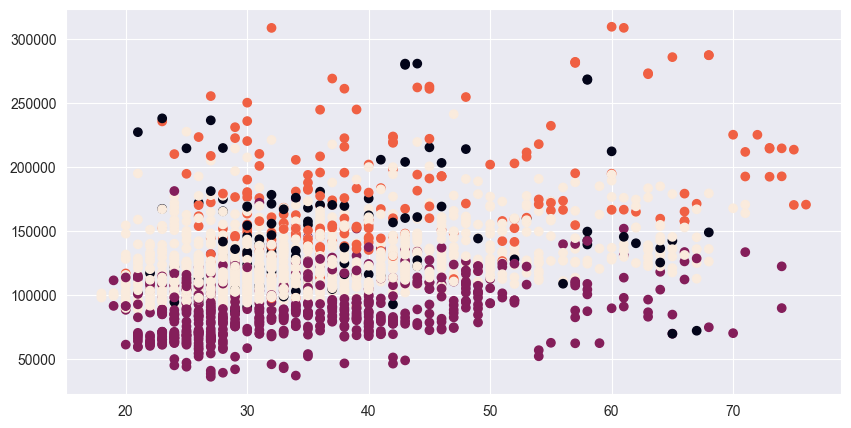

In [296]:
gmm = GaussianMixture(n_components=4)
gmm.fit(data)
# labels = gmm.labels_

#predictions from gmm
labels_gmm = gmm.predict(data)
# df_gmm = data
df_gmm = pd.DataFrame(data)
df_gmm['cluster'] = labels_gmm
df_gmm.drop(columns=['ID','Sex','Marital status','Occupation','Settlement size'])
# df_gmm.columns = ['Age', 'Income', 'cluster']
# 
# color=['blue','green','cyan', 'black']
plt.figure(figsize=(10,5))
# for k in range(0,4):
#     data_gmm_plt = df_gmm[df_gmm["cluster"]==k]
#     plt.scatter(data_gmm_plt["Age"],data_gmm_plt["Income"],c=color[k])

plt.scatter(df_gmm["Age"],df_gmm["Income"],c=df_gmm['cluster'])
plt.show()

In [135]:
sil_scores = []
calinski_score = []
davies_score = []

sil_scores.append(metrics.silhouette_score(df_gmm, labels_gmm))
calinski_score.append(calinski_harabasz_score(df_gmm, labels_gmm))
davies_score.append(davies_bouldin_score(df_gmm, labels_gmm))

print(sil_scores)
print(calinski_score)
print(davies_score)

[0.17045798705515106]
[676.3913416852832]
[2.5560754553806735]


# Mean-Shift clustering algorithm

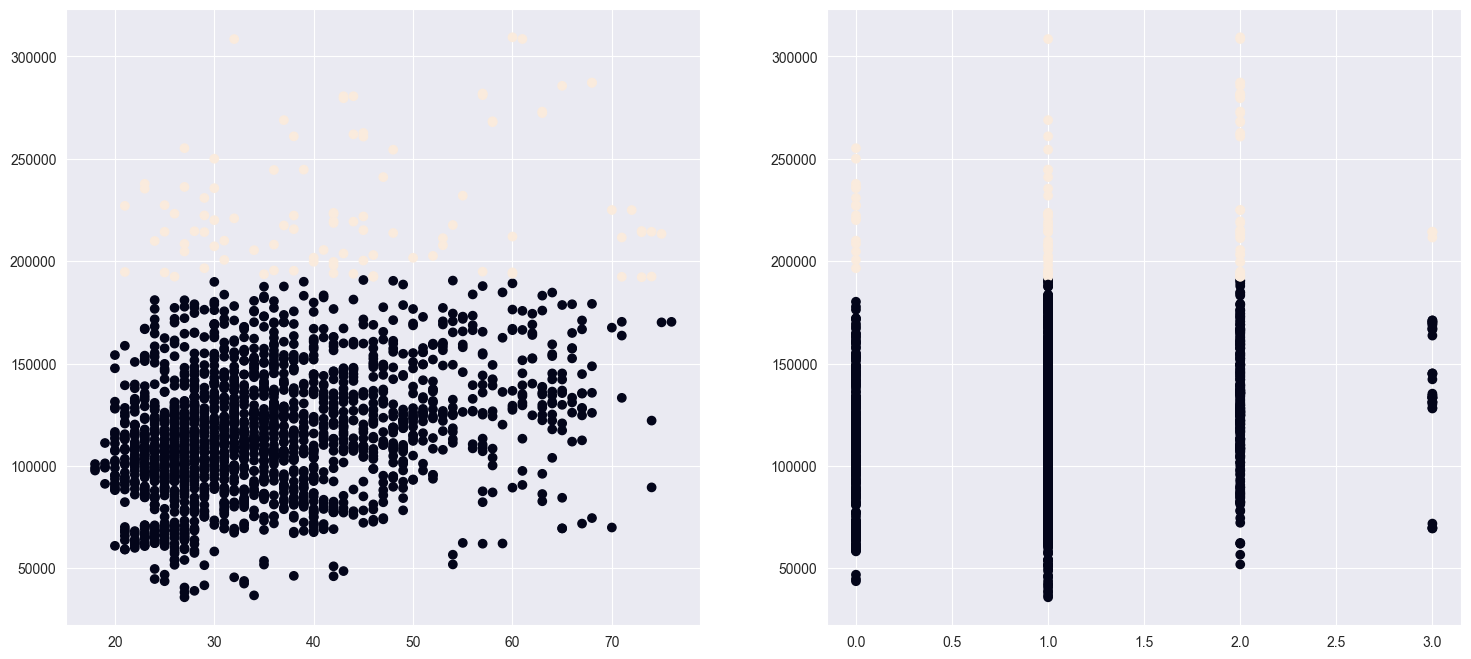

In [103]:
ms = MeanShift(bandwidth=22000)
# Fitting the model to the data
ms.fit(data)
labels_ms = ms.labels_

# df_gmm = data
df_ms = pd.DataFrame(data)
df_ms['cluster'] = labels_ms
df_ms.drop(columns=['ID','Sex','Marital status','Occupation','Settlement size'])
# df_gmm_.columns = ['Age', 'Income', 'cluster']
labels_ms_pred = ms.predict(data)
#
# Extracting the cluster labels and cluster centers
centers = ms.cluster_centers_
# Visualizing the clusters
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.scatter(df_ms['Age'], df_ms['Income'], c=labels_ms)

plt.subplot(1,2,2)
plt.scatter(df_ms['Education'], df_ms['Income'], c=labels_ms)

# plt.scatter(centers[:, 0], centers[:, 1], marker='o', color='red', s=200)
# plt.xlabel('Sepal Length')
# plt.ylabel('Sepal Width')
# plt.title('Mean-Shift Clustering on Iris Dataset')
plt.show()

In [104]:
sil_scores = []
calinski_score = []
davies_score = []

sil_scores.append(silhouette_score(df_ms, labels_ms))
calinski_score.append(calinski_harabasz_score(df_ms, labels_ms))
davies_score.append(davies_bouldin_score(df_ms, labels_ms))

print(sil_scores)
print(calinski_score)
print(davies_score)
# DBSCAN

[0.6642215564432036]
[1369.1993268943736]
[0.43799394940084535]
